In [2]:
import pandas as pd

In [3]:
Patients_df = pd.read_csv('Patients.csv')

In [4]:
Patients_df

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119
...,...,...,...,...,...,...,...,...,...,...
95,25,99,'Male',69,'Alexander','County General Hospital','Good',1,128,171
96,44,92,'Male',69,'Russell','VA Hospital','Good',1,124,188
97,49,74,'Male',70,'Griffin','County General Hospital','Fair',0,119,186
98,45,93,'Male',68,'Diaz','County General Hospital','Good',1,136,172


In [5]:
!pip install plotly matplotlib seaborn --quiet

In [6]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [8]:
Patients_df.Age.describe()

count    100.000000
mean      38.280000
std        7.215416
min       25.000000
25%       32.000000
50%       39.000000
75%       44.000000
max       50.000000
Name: Age, dtype: float64

In [9]:
fig = px.histogram(Patients_df, 
                   x='Age', 
                   marginal='box', 
                   nbins=26, 
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(Patients_df, 
                   x='Weight', 
                   marginal='box', 
                   color_discrete_sequence=['red'], 
                   title='Distribution of Weight')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(Patients_df, 
                   x='Systolic', 
                   marginal='box', 
                   color='Smoker', 
                   color_discrete_sequence=['green', 'grey'], 
                   title='Systolic Blood Pressure Level')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
Patients_df.Smoker.value_counts()

0    66
1    34
Name: Smoker, dtype: int64

In [13]:
px.histogram(Patients_df, x='Smoker', color='Gender', title='Smoker')

In [14]:
fig = px.scatter(Patients_df, 
                 x='Age', 
                 y='Systolic', 
                 color='Smoker', 
                 opacity=0.8, 
                 hover_data=['Gender'], 
                 title='Age vs. Systolic')
fig.update_traces(marker_size=5)
fig.show()

In [15]:
fig = px.scatter(Patients_df, 
                 x='Weight', 
                 y='Systolic', 
                 color='Smoker', 
                 opacity=0.8, 
                 hover_data=['Gender'], 
                 title='Weight vs. Systolic')
fig.update_traces(marker_size=5)
fig.show()

In [16]:
fig = px.scatter(Patients_df, 
                 x='Height', 
                 y='Systolic', 
                 color='Smoker', 
                 opacity=0.8, 
                 hover_data=['Gender'], 
                 title='Height vs. Systolic')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
Patients_df.Systolic.corr(Patients_df.Age)

0.134126990051016

In [18]:
Patients_df.Systolic.corr(Patients_df.Weight)

0.15578811264461603

In [19]:
Patients_df.Systolic.corr(Patients_df.Height)

0.21407555251019653

In [20]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = Patients_df.Smoker.map(smoker_values)
Patients_df.Systolic.corr(Patients_df.Smoker)

0.7063229808258187

In [21]:
Patients_df.corr()

,Age,Diastolic,Height,Smoker,Systolic,Weight
Age,1.000000,0.080597,0.116002,0.060220,0.134127,0.091356
Diastolic,0.080597,1.000000,0.156819,0.723365,0.511843,0.222687
Height,0.116002,0.156819,1.000000,0.199114,0.214076,0.695970
Smoker,0.060220,0.723365,0.199114,1.000000,0.706323,0.215586
Systolic,0.134127,0.511843,0.214076,0.706323,1.000000,0.155788
Weight,0.091356,0.222687,0.695970,0.215586,0.155788,1.000000


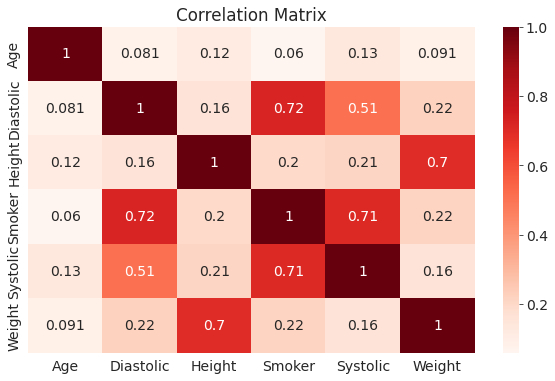

In [22]:
sns.heatmap(Patients_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [23]:
non_smoker_df = Patients_df[Patients_df.Smoker == 0]


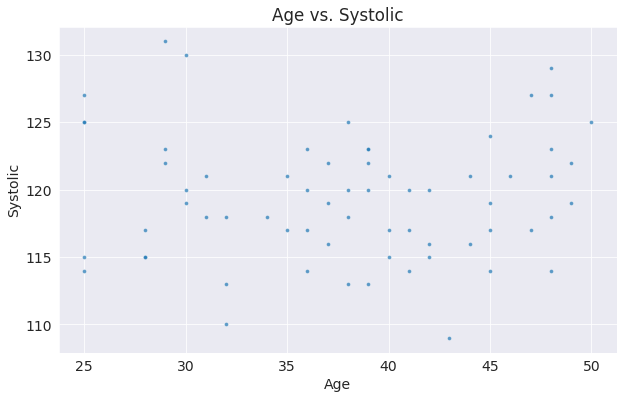

In [24]:
plt.title('Age vs. Systolic')
sns.scatterplot(data=non_smoker_df, x='Age', y='Systolic', alpha=0.7, s=15);

In [25]:
def estimate_Systolic(Age, w, b):
    return w * Age + b

In [26]:
w = 2
b = 30

In [27]:
w = 3
b = 3

In [28]:
Ages = non_smoker_df.Age
estimated_Systolic = estimate_Systolic(Ages, w, b)

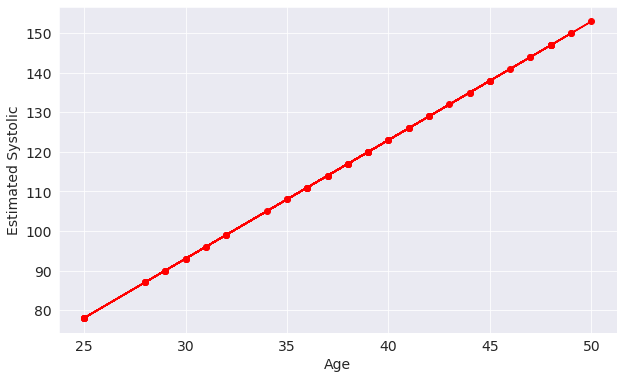

In [29]:
plt.plot(Ages, estimated_Systolic, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Systolic');

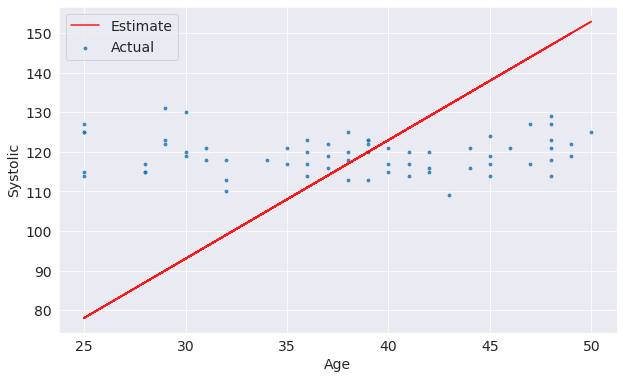

In [30]:
target = non_smoker_df.Systolic

plt.plot(Ages, estimated_Systolic, 'r', alpha=0.9);
plt.scatter(Ages, target, s=8,alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Systolic')
plt.legend(['Estimate', 'Actual']);

In [31]:
def try_parameters(w, b):
    Ages = non_smoker_df.Age
    target = non_smoker_df.Systolic
    
    estimated_Systolic = estimate_Systolic(Ages, w, b)
    
    plt.plot(Ages, estimated_Systolic, 'r', alpha=0.9);
    plt.scatter(Ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Systolic')
    plt.legend(['Estimate', 'Actual']);

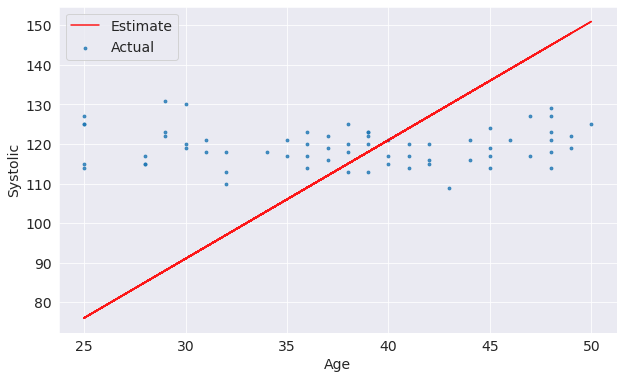

In [32]:
try_parameters(3, 1)

In [33]:
import numpy as np

In [34]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [35]:
w = 3
b = 3

In [36]:
targets = non_smoker_df['Systolic']
predicted = estimate_Systolic(non_smoker_df.Age, w, b)

In [37]:
rmse(targets, predicted)

22.215882934185952

In [38]:
def try_parameters(w, b):
    Ages = non_smoker_df.Age
    target = non_smoker_df.Systolic
    predictions = estimate_Systolic(Ages, w, b)
    
    plt.plot(Ages, predictions, 'r', alpha=0.9);
    plt.scatter(Ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Systolic')
    plt.legend(['Prediction', 'Actual']);
    
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  22.215882934185952


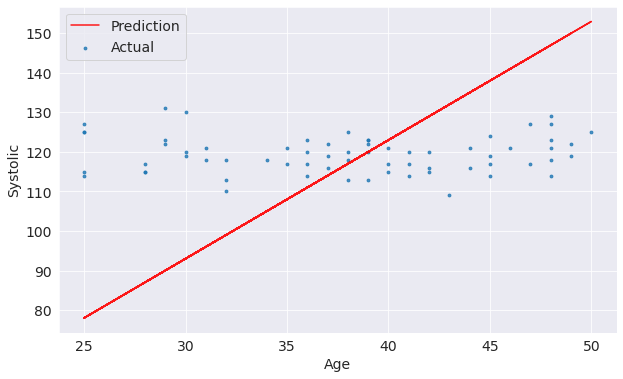

In [39]:
try_parameters(3, 3)

In [40]:
!pip install scikit-learn --quiet

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
model = LinearRegression()

In [43]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : returns an instance of self.



In [44]:
inputs = Patients_df[['Age']]
targets = Patients_df.Systolic
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (100, 1)
targes.shape : (100,)


In [45]:
model.fit(inputs, targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.predict(np.array([[25], 
                        [36], 
                        [50]]))

array([121.12285998, 122.49549102, 124.24247598])

In [47]:
predictions = model.predict(inputs)

In [48]:
predictions

array([122.7450603 , 123.3689835 , 122.7450603 , 122.99462958,
       124.11769134, 123.74333742, 122.1211371 , 122.99462958,
       121.4972139 , 121.87156782, 123.61855278, 123.24419886,
       121.12285998, 122.86984494, 122.49549102, 123.9929067 ,
       121.99635246, 121.37242926, 122.62027566, 124.24247598,
       123.9929067 , 122.86984494, 123.11941422, 123.49376814,
       121.4972139 , 121.12285998, 122.86984494, 121.12285998,
       122.49549102, 121.74678318, 123.61855278, 122.99462958,
       121.12285998, 123.86812206, 123.49376814, 123.9929067 ,
       123.49376814, 122.37070638, 122.1211371 , 122.7450603 ,
       122.86984494, 123.49376814, 123.49376814, 122.62027566,
       123.61855278, 122.62027566, 121.74678318, 122.86984494,
       123.24419886, 123.24419886, 124.11769134, 123.49376814,
       123.3689835 , 123.86812206, 124.24247598, 122.7450603 ,
       123.11941422, 123.61855278, 122.49549102, 122.7450603 ,
       121.62199854, 121.4972139 , 121.74678318, 121.49

In [49]:
rmse(targets, predictions)

6.61883940804608

In [50]:
# w
model.coef_

array([0.12478464])

In [51]:
# b
model.intercept_

118.00324398156053

RMSE Loss:  5.775580444342182


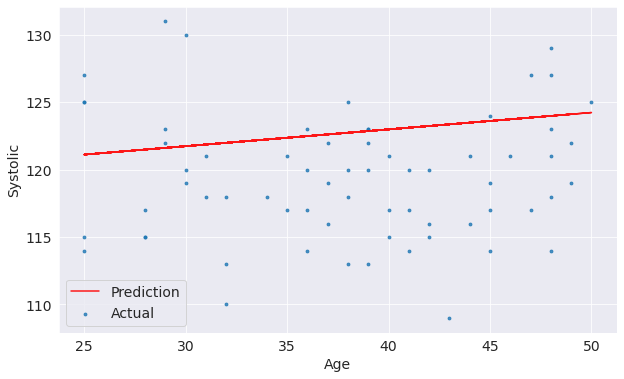

In [52]:
try_parameters(model.coef_, model.intercept_)

In [53]:
# Create inputs and targets
inputs, targets = Patients_df[['Age', 'Weight']], Patients_df['Systolic']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6.548450284122202


In [54]:
non_smoker_df.Systolic.corr(non_smoker_df.Weight)

-0.030177610486751022

In [55]:
fig = px.scatter(non_smoker_df, x='Weight', y='Systolic', title='Weight vs. Systolic')
fig.update_traces(marker_size=5)
fig.show()

In [56]:
model.coef_, model.intercept_

(array([0.11248253, 0.03656693]), 112.84286158185228)

In [57]:
Patients_df.Systolic.corr(Patients_df.Smoker)

0.7063229808258187

In [82]:
fig = px.strip(Patients_df, x='Smoker', y='Systolic', title= "Smoker vs. Systolic")
fig.update_traces(marker_size=4, marker_opacity=0.7)
fig.show()

In [58]:
# Create inputs and targets
inputs, targets = Patients_df[['Age', 'Weight', 'Smoker']], Patients_df['Systolic']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4.688172988059595


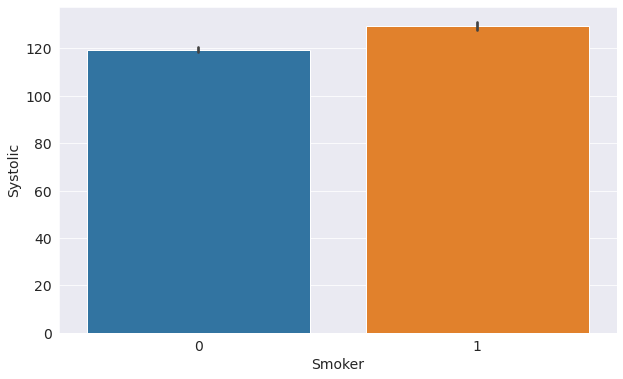

In [59]:
sns.barplot(data=Patients_df, x='Smoker', y='Systolic');

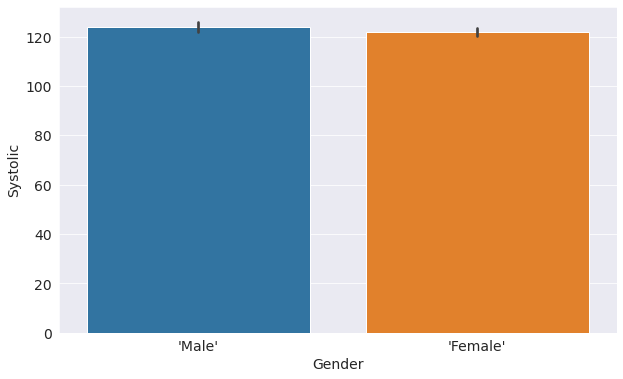

In [60]:
sns.barplot(data=Patients_df, x='Gender', y='Systolic')

In [61]:
Patients_df

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119
...,...,...,...,...,...,...,...,...,...,...
95,25,99,'Male',69,'Alexander','County General Hospital','Good',1,128,171
96,44,92,'Male',69,'Russell','VA Hospital','Good',1,124,188
97,49,74,'Male',70,'Griffin','County General Hospital','Fair',0,119,186
98,45,93,'Male',68,'Diaz','County General Hospital','Good',1,136,172


In [62]:
sex_codes = {'Female': 1, 'Male': 0}

In [63]:
Patients_df['sex_code'] = Patients_df.Gender.map(sex_codes)

In [64]:
Patients_df

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight,sex_code
0,38,93,'Male',71,'Smith','County General Hospital','Excellent',1,124,176,NaN
1,43,77,'Male',69,'Johnson','VA Hospital','Fair',0,109,163,NaN
2,38,83,'Female',64,'Williams','St. Mary's Medical Center','Good',0,125,131,NaN
3,40,75,'Female',67,'Jones','VA Hospital','Fair',0,117,133,NaN
4,49,80,'Female',64,'Brown','County General Hospital','Good',0,122,119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,25,99,'Male',69,'Alexander','County General Hospital','Good',1,128,171,NaN
96,44,92,'Male',69,'Russell','VA Hospital','Good',1,124,188,NaN
97,49,74,'Male',70,'Griffin','County General Hospital','Fair',0,119,186,NaN
98,45,93,'Male',68,'Diaz','County General Hospital','Good',1,136,172,NaN


In [65]:
from sklearn import preprocessing 
label = preprocessing.LabelEncoder() 
 
Patients_df['Gender']= label.fit_transform(Patients_df['Gender']) 
print(Patients_df['Gender'].unique())

[1 0]


In [66]:
Patients_df

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight,sex_code
0,38,93,1,71,'Smith','County General Hospital','Excellent',1,124,176,NaN
1,43,77,1,69,'Johnson','VA Hospital','Fair',0,109,163,NaN
2,38,83,0,64,'Williams','St. Mary's Medical Center','Good',0,125,131,NaN
3,40,75,0,67,'Jones','VA Hospital','Fair',0,117,133,NaN
4,49,80,0,64,'Brown','County General Hospital','Good',0,122,119,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,25,99,1,69,'Alexander','County General Hospital','Good',1,128,171,NaN
96,44,92,1,69,'Russell','VA Hospital','Good',1,124,188,NaN
97,49,74,1,70,'Griffin','County General Hospital','Fair',0,119,186,NaN
98,45,93,1,68,'Diaz','County General Hospital','Good',1,136,172,NaN


In [67]:
Patients_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       100 non-null    int64  
 1   Diastolic                 100 non-null    int64  
 2   Gender                    100 non-null    int64  
 3   Height                    100 non-null    int64  
 4   LastName                  100 non-null    object 
 5   Location                  100 non-null    object 
 6   SelfAssessedHealthStatus  100 non-null    object 
 7   Smoker                    100 non-null    int64  
 8   Systolic                  100 non-null    int64  
 9   Weight                    100 non-null    int64  
 10  sex_code                  0 non-null      float64
dtypes: float64(1), int64(7), object(3)
memory usage: 8.7+ KB


In [68]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
Gender = ['Female', 'Male']
Location = ['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"]
SelfAssessedHealthStatus = ['Fair', 'Good', 'Excellent']
enc = preprocessing.OneHotEncoder(categories=[Gender,Location,SelfAssessedHealthStatus])
X = [['Male', 'County General Hospital', 'Fair'], ['Female', 'VA Hospital', 'Good']]
enc.fit(X)
OneHotEncoder(categories=[['Female', 'Male'],
                          ['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"],
                          ['Fair', 'Good', 'Excellent']])
enc.transform([['Female', 'VA Hospital', 'Good']]).toarray()


array([[1., 0., 0., 1., 0., 0., 1., 0.]])

In [69]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(Patients_df[['Location']])
enc.categories_

[array(["'County General Hospital'", "'St. Mary's Medical Center'",
        "'VA Hospital'"], dtype=object)]

In [70]:
one_hot = enc.transform(Patients_df[['Location']]).toarray()
one_hot

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0

In [71]:
Patients_df[['County General Hospital', 'VA Hospital', "St. Mary's Medical Center"]] = one_hot

In [72]:
Patients_df

,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight,sex_code,County General Hospital,VA Hospital,St. Mary's Medical Center
0,38,93,1,71,'Smith','County General Hospital','Excellent',1,124,176,NaN,1.0,0.0,0.0
1,43,77,1,69,'Johnson','VA Hospital','Fair',0,109,163,NaN,0.0,0.0,1.0
2,38,83,0,64,'Williams','St. Mary's Medical Center','Good',0,125,131,NaN,0.0,1.0,0.0
3,40,75,0,67,'Jones','VA Hospital','Fair',0,117,133,NaN,0.0,0.0,1.0
4,49,80,0,64,'Brown','County General Hospital','Good',0,122,119,NaN,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,99,1,69,'Alexander','County General Hospital','Good',1,128,171,NaN,1.0,0.0,0.0
96,44,92,1,69,'Russell','VA Hospital','Good',1,124,188,NaN,0.0,0.0,1.0
97,49,74,1,70,'Griffin','County General Hospital','Fair',0,119,186,NaN,1.0,0.0,0.0
98,45,93,1,68,'Diaz','County General Hospital','Good',1,136,172,NaN,1.0,0.0,0.0


In [73]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(Patients_df[['SelfAssessedHealthStatus']])
enc.categories_

[array(["'Excellent'", "'Fair'", "'Good'", "'Poor'"], dtype=object)]

In [74]:
one_hot = enc.transform(Patients_df[['SelfAssessedHealthStatus']]).toarray()
one_hot

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],


In [75]:
Patients_df[['Excellent', 'Fair', 'Good', 'Poor']] = one_hot

In [76]:
Patients_df =Patients_df.dropna(axis=1)

In [77]:
Patients_df


,Age,Diastolic,Gender,Height,LastName,Location,SelfAssessedHealthStatus,Smoker,Systolic,Weight,County General Hospital,VA Hospital,St. Mary's Medical Center,Excellent,Fair,Good,Poor
0,38,93,1,71,'Smith','County General Hospital','Excellent',1,124,176,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,43,77,1,69,'Johnson','VA Hospital','Fair',0,109,163,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,38,83,0,64,'Williams','St. Mary's Medical Center','Good',0,125,131,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40,75,0,67,'Jones','VA Hospital','Fair',0,117,133,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,49,80,0,64,'Brown','County General Hospital','Good',0,122,119,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,25,99,1,69,'Alexander','County General Hospital','Good',1,128,171,1.0,0.0,0.0,0.0,0.0,1.0,0.0
96,44,92,1,69,'Russell','VA Hospital','Good',1,124,188,0.0,0.0,1.0,0.0,0.0,1.0,0.0
97,49,74,1,70,'Griffin','County General Hospital','Fair',0,119,186,1.0,0.0,0.0,0.0,1.0,0.0,0.0
98,45,93,1,68,'Diaz','County General Hospital','Good',1,136,172,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
# Create inputs and targets

inputs, targets = Patients_df[['Age', 'Weight', 'Smoker','Gender', 'County General Hospital','VA Hospital',"St. Mary's Medical Center", 'Excellent','Good', 'Fair',	'Poor' ]], Patients_df['Systolic']

# Create and train the model
model = LinearRegression().fit(inputs, targets)


# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4.530621990685625


In [79]:
Patients_df.isnull().sum()

Age                          0
Diastolic                    0
Gender                       0
Height                       0
LastName                     0
Location                     0
SelfAssessedHealthStatus     0
Smoker                       0
Systolic                     0
Weight                       0
County General Hospital      0
VA Hospital                  0
St. Mary's Medical Center    0
Excellent                    0
Fair                         0
Good                         0
Poor                         0
dtype: int64

In [80]:
model.coef_

array([ 0.09132731, -0.01515041,  9.87541468,  0.5488521 ,  0.57694361,
        0.17733968, -0.75428329,  0.55602622,  0.77978667, -2.11802701,
        0.78221412])

In [81]:
model.intercept_

117.74376452559399

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
numeric_cols = ['Age', 'Weight', 'Height'] 
scaler = StandardScaler()
scaler.fit(Patients_df[numeric_cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [87]:
scaler.mean_

array([ 38.28, 154.  ,  67.07])

In [88]:
scaler.var_

array([ 51.5416, 698.98  ,   7.9651])

In [89]:
scaled_inputs = scaler.transform(Patients_df[numeric_cols])
scaled_inputs

array([[-0.0390013 ,  0.83212833,  1.39250555],
       [ 0.65745049,  0.34041613,  0.68385132],
       [-0.0390013 , -0.86995234, -1.08778423],
       [ 0.23957941, -0.79430431, -0.0248029 ],
       [ 1.49319263, -1.32384052, -1.08778423],
       [ 1.07532156, -0.45388818,  0.32952421],
       [-0.73545309, -0.45388818, -1.08778423],
       [ 0.23957941,  0.98342439,  0.32952421],
       [-1.43190487,  1.09689643,  0.32952421],
       [-1.0140338 , -0.83212833, -0.37913001],
       [ 0.9360312 , -0.98342439,  0.32952421],
       [ 0.51816013, -0.64300825, -0.37913001],
       [-1.84977594,  0.7564803 ,  1.39250555],
       [ 0.10028906,  1.81555271,  1.74683266],
       [-0.31758201, -0.94560037, -0.73345712],
       [ 1.35390227,  1.0212484 ,  1.39250555],
       [-0.87474344,  1.39948855,  0.68385132],
       [-1.57119523, -0.86995234,  0.68385132],
       [-0.17829166,  0.94560037,  1.03817844],
       [ 1.63248299,  0.68083227,  0.32952421],
       [ 1.35390227, -0.79430431, -0.733

In [90]:
cat_cols = ['Gender','Smoker','County General Hospital','VA Hospital',"St. Mary's Medical Center", 'Excellent','Good', 'Fair',	'Poor']
categorical_data = Patients_df[cat_cols].values

In [91]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = Patients_df.Systolic

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4.445982271245141


In [92]:
Weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
Weights_df.sort_values('weight', ascending=False)

,feature,weight
12,1,119.871389
4,Smoker,9.673087
2,Height,1.325387
9,Good,1.012690
11,Poor,0.885655
5,County General Hospital,0.863780
0,Age,0.576204
8,Excellent,0.426312
6,VA Hospital,0.007280
1,Weight,-0.354757


In [93]:
from sklearn.model_selection import train_test_split

In [94]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)



In [95]:
# Create and train the model
model = LinearRegression().fit(inputs_train, targets_train)

# Generate predictions
predictions_test = model.predict(inputs_test)

# Compute loss to evalute the model
loss = rmse(targets_test, predictions_test)
print('Test Loss:', loss)

Test Loss: 4.20189185002708


In [96]:
# Generate predictions
predictions_train = model.predict(inputs_train)

# Compute loss to evalute the model
loss = rmse(targets_train, predictions_train)
print('Training Loss:', loss)

Training Loss: 4.504253122353481
